In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import config


df = pd.read_csv(config.CONFIG['paths']['train_preprocessed'])


def create_stratified_folds(df, target_column, n_splits, random_state, shuffle):
    df = df.copy()
    df['fold'] = -1

    skf = StratifiedKFold(
        n_splits=n_splits,
        shuffle=shuffle,
        random_state=random_state,
    )

    for fold, (_, val_idx) in enumerate(skf.split(df, df[target_column])):
        df.loc[val_idx, 'fold'] = fold

    return df


df_with_folds = create_stratified_folds(
    df=df,
    target_column=config.CONFIG['validation']['target_column'],
    n_splits=config.CONFIG['validation']['n_splits'],
    random_state=config.CONFIG['validation']['random_state'],
    shuffle=config.CONFIG['validation']['shuffle']
)

In [2]:
for fold in range(config.CONFIG['validation']['n_splits']):
    train_fold = df_with_folds[df_with_folds['fold'] != fold]
    val_fold = df_with_folds[df_with_folds['fold'] == fold]
    
    print(f"Fold {fold}:")
    print(f"  Train target distribution: {train_fold[config.CONFIG['validation']['target_column']].value_counts(normalize=True).to_dict()}")
    print(f"  Val target distribution: {val_fold[config.CONFIG['validation']['target_column']].value_counts(normalize=True).to_dict()}\n")

Fold 0:
  Train target distribution: {0: 0.6165730337078652, 1: 0.38342696629213485}
  Val target distribution: {0: 0.6145251396648045, 1: 0.3854748603351955}

Fold 1:
  Train target distribution: {0: 0.6157082748948106, 1: 0.38429172510518933}
  Val target distribution: {0: 0.6179775280898876, 1: 0.38202247191011235}

Fold 2:
  Train target distribution: {0: 0.6157082748948106, 1: 0.38429172510518933}
  Val target distribution: {0: 0.6179775280898876, 1: 0.38202247191011235}

Fold 3:
  Train target distribution: {0: 0.6157082748948106, 1: 0.38429172510518933}
  Val target distribution: {0: 0.6179775280898876, 1: 0.38202247191011235}

Fold 4:
  Train target distribution: {0: 0.6171107994389902, 1: 0.38288920056100983}
  Val target distribution: {0: 0.6123595505617978, 1: 0.38764044943820225}



In [3]:
output_path = config.CONFIG['paths']['checkpoint_dir'] / 'train_with_folds.csv'
df_with_folds.to_csv(output_path, index=False)

print(f"Saved to {output_path}")
print(f"Shape: {df_with_folds.shape}")
print(f"Folds distribution:\n{df_with_folds['fold'].value_counts().sort_index()}")

Saved to C:\newTry2\classicMLpractice\ProjectKaggle\checkpoints\train_with_folds.csv
Shape: (891, 12)
Folds distribution:
fold
0    179
1    178
2    178
3    178
4    178
Name: count, dtype: int64


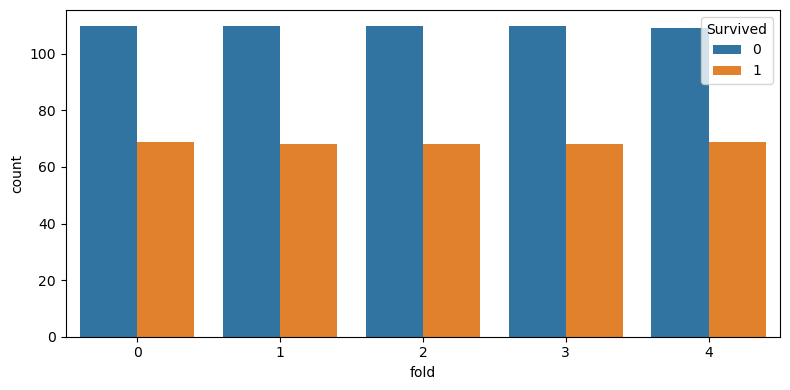

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.countplot(data=df_with_folds, x='fold', hue=config.CONFIG['validation']['target_column'])
plt.title('')
plt.tight_layout()
plt.show()